[-1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1
  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1]


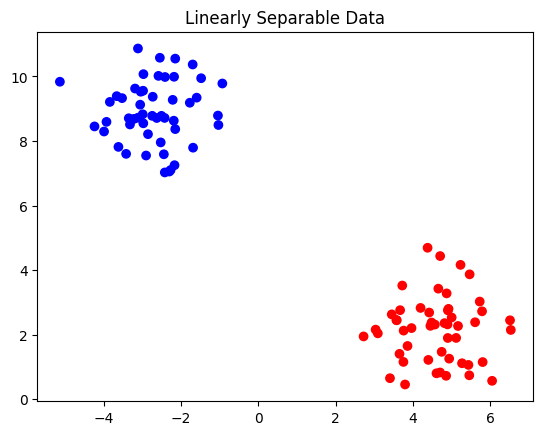

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=100,centers=2,random_state=42,cluster_std=1)
y = np.where(y==0,-1,1)
# print(y)
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plt.title("Linearly Separable Data")
plt.show()

In [93]:
from sklearn.svm import SVC

svm_head = SVC(kernel='linear',C=1e6)
svm_head.fit(X,y)
print("number of support vectors",len(svm_head.support_vectors_))

number of support vectors 2


In [94]:
w = svm_head.coef_[0]
b = svm_head.intercept_[0]
print(" W ",w)
print(" b ",b)

 W  [ 0.24748994 -0.17407192]
 b  0.7341550476191021


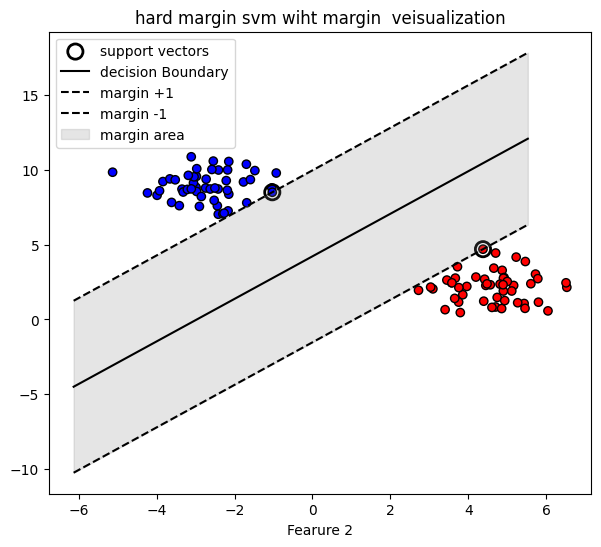

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolors='k')

plt.scatter(
    svm_head.support_vectors_[:,0],
    svm_head.support_vectors_[:,1],
    s=120,facecolors="none",edgecolors='k',linewidths=2,
    label="support vectors"
)

x_val = np.linspace(X[:,0].min()-1,X[:,0].max()-1,200)
y_decision = -(w[0]*x_val+b)/w[1]

y_margin_pos = -(w[0] * x_val+b-1)/w[1]
y_margin_neg = -(w[0] * x_val+b+1)/w[1]

plt.plot(x_val,y_decision,'k-',label="decision Boundary")
plt.plot(x_val,y_margin_pos,'k--',label="margin +1")
plt.plot(x_val,y_margin_neg,'k--',label="margin -1")

plt.fill_between(
    x_val,y_margin_pos,y_margin_neg,
    color='gray',alpha=0.2,label="margin area"
)

plt.xlabel("Feature 1")
plt.xlabel("Fearure 2")
plt.title("hard margin svm wiht margin veisualization")
plt.legend()
plt.show()

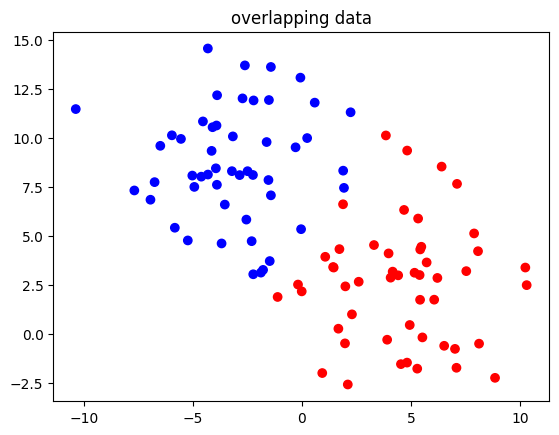

In [97]:
x_overlap,y_overlap = make_blobs(n_samples=100,centers=2,random_state=42,cluster_std=3)
y_overlap=np.where(y_overlap==0,-1,1)

plt.scatter(x_overlap[:,0],x_overlap[:,1],c=y_overlap,cmap='bwr')
plt.title("overlapping data")
plt.show()

In [99]:
from sklearn.svm import SVC

svm_head = SVC(kernel='linear',C=1e6)
svm_head.fit(x_overlap,y_overlap)
print("number of support vectors",len(svm_head.support_vectors_))

number of support vectors 3


In [100]:
w = svm_head.coef_[0]
b = svm_head.intercept_[0]
print(" W ",w)
print(" b ",b)

 W  [ 6.42872096 -3.87151047]
 b  15.50812556660477


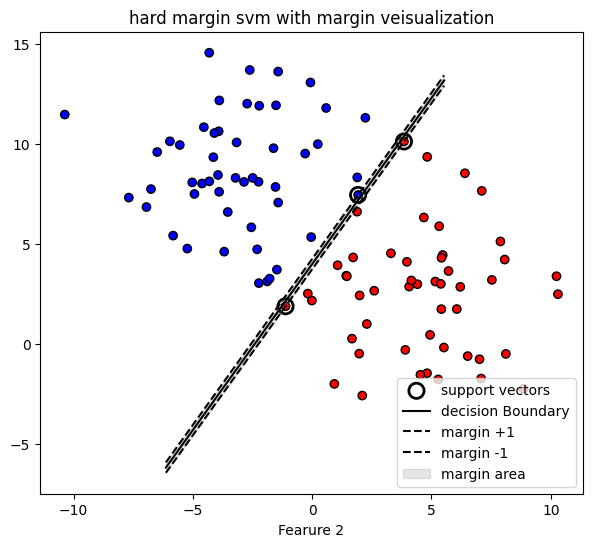

In [103]:
plt.figure(figsize=(7,6))
plt.scatter(x_overlap[:,0],x_overlap[:,1],c=y_overlap,cmap='bwr',edgecolors='k')

plt.scatter(
    svm_head.support_vectors_[:,0],
    svm_head.support_vectors_[:,1],
    s=120,facecolors="none",edgecolors='k',linewidths=2,
    label="support vectors"
)

x_val = np.linspace(X[:,0].min()-1,X[:,0].max()-1,200)
y_decision = -(w[0]*x_val+b)/w[1]

y_margin_pos = -(w[0] * x_val+b-1)/w[1]
y_margin_neg = -(w[0] * x_val+b+1)/w[1]

plt.plot(x_val,y_decision,'k-',label="decision Boundary")
plt.plot(x_val,y_margin_pos,'k--',label="margin +1")
plt.plot(x_val,y_margin_neg,'k--',label="margin -1")

plt.fill_between(
    x_val,y_margin_pos,y_margin_neg,
    color='gray',alpha=0.2,label="margin area"
)

plt.xlabel("Feature 1")
plt.xlabel("Fearure 2")
plt.title("hard margin svm with margin veisualization")
plt.legend()
plt.show()

soft margin


In [ ]:
from sklearn.svm import SVC

svm_head = SVC(kernel='linear',C=1) #c=regularization parameter in soft the value is low and  it will try to max the margin area and ignor some of the data points as a outlier
svm_head.fit(X,y)
print("number of support vectors",len(svm_head.support_vectors_))